In [358]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.decomposition import PCA
from sklearn import metrics

In [359]:
np.random.default_rng(1234)

Generator(PCG64) at 0x2C8067E60

In [360]:
dim = [100,500,1000,2000,4000,6000,8000,10000]
n = 15
current_mean = [np.squeeze(np.array([0] * (int(dim[0]*.9)) + [2] * int((dim[0]*.1))))]
cov = np.identity(dim[0]) 
samples = [np.random.multivariate_normal(current_mean[0] ,cov, n)]
for j in range(1,8):
    previous_samples = samples[j-1]
    current_mean.append(np.array([0] * int((dim[j]-dim[j-1])*.9) + [1] * int((dim[j]-dim[j-1])*.1)))
    current_cov = np.identity(dim[j]-dim[j-1])
    samples.append(np.concatenate([previous_samples,np.random.multivariate_normal(current_mean[j] , current_cov, n)],axis=1))


In [361]:
pca = PCA(n_components = 4)
pca_fit = [pca.fit(samples[i]) for i in range(8)]

In [362]:
print("Explained Variance Ratio Across All Dimensions: {}".format([(pca_fit[i].explained_variance_ratio_) for i in range(8)]))
print("First Four Principal Component Across All Dimensions: {}".format([(pca_fit[i].singular_values_ )for i in range(8)]))

Explained Variance Ratio Across All Dimensions: [array([0.07601006, 0.07541275, 0.07437024, 0.07407243]), array([0.07601006, 0.07541275, 0.07437024, 0.07407243]), array([0.07601006, 0.07541275, 0.07437024, 0.07407243]), array([0.07601006, 0.07541275, 0.07437024, 0.07407243]), array([0.07601006, 0.07541275, 0.07437024, 0.07407243]), array([0.07601006, 0.07541275, 0.07437024, 0.07407243]), array([0.07601006, 0.07541275, 0.07437024, 0.07407243]), array([0.07601006, 0.07541275, 0.07437024, 0.07407243])]
First Four Principal Component Across All Dimensions: [array([102.99183425, 102.5863678 , 101.87482019, 101.67064183]), array([102.99183425, 102.5863678 , 101.87482019, 101.67064183]), array([102.99183425, 102.5863678 , 101.87482019, 101.67064183]), array([102.99183425, 102.5863678 , 101.87482019, 101.67064183]), array([102.99183425, 102.5863678 , 101.87482019, 101.67064183]), array([102.99183425, 102.5863678 , 101.87482019, 101.67064183]), array([102.99183425, 102.5863678 , 101.87482019, 1

In [363]:
pca_fit_data = np.array([pca.fit_transform(samples[i]) for i in range(8)])

In [364]:
np.array(pca_fit_data).T.shape

(4, 15, 8)

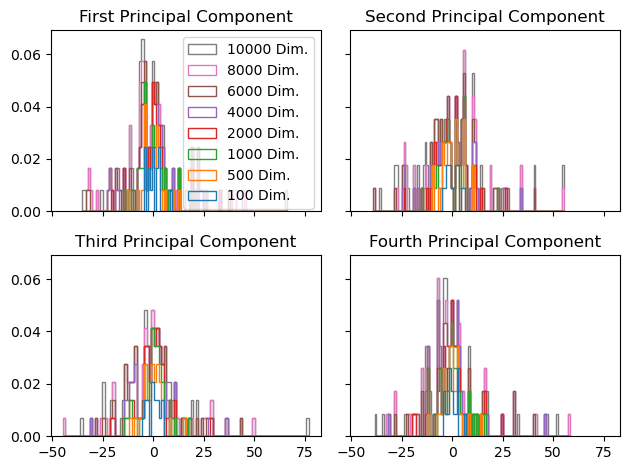

In [365]:

n_bins = 100

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

ax0.hist(pca_fit_data.T[0,:,:],
         n_bins,
         histtype='step',
         density = True,
         stacked=True,
         fill=False,
         label = ["{} Dim.".format(dim[0]),
                  "{} Dim.".format(dim[1]),
                  "{} Dim.".format(dim[2]),
                  "{} Dim.".format(dim[3]),
                  "{} Dim.".format(dim[4]),
                  "{} Dim.".format(dim[5]),
                  "{} Dim.".format(dim[6]),
                  "{} Dim.".format(dim[7])])
ax0.set_title('First Principal Component')
ax0.legend()


ax1.hist(pca_fit_data.T[1,:,:], n_bins, histtype='step', density = True, stacked=True, fill=False)
ax1.set_title('Second Principal Component')

ax2.hist(pca_fit_data.T[2,:,:], n_bins, histtype='step', density = True, stacked=True, fill=False)
ax2.set_title('Third Principal Component')

# Make a multiple-histogram of data-sets with different length.
ax3.hist(pca_fit_data.T[3,:,:], n_bins, histtype='step', density = True, stacked=True, fill=False)
ax3.set_title('Fourth Principal Component')

fig.tight_layout()
plt.show()

In [366]:
test_of_means = [sp.stats.ttest_1samp(samples[i], 0,alternative='greater') for i in range(8)]

In [367]:
full_means = current_mean
interim = current_mean
for j in range(1,8):
    full_means[j] = np.concatenate([current_mean[j-1],interim[j]])

In [368]:
FPR = [np.sum(np.array(test_of_means[i].pvalue<.05).astype(float)*np.array(full_means[i]==0).astype(float))/(np.sum(np.array(full_means[i]==0).astype(float))) for i in range(8)]
TPR = [np.sum(np.array(test_of_means[i].pvalue<.05).astype(float)*np.array(full_means[i]>0).astype(float))/(np.sum(np.array(full_means[i]>0).astype(float))) for i in range(8)]
FNR = [np.sum(np.array(test_of_means[i].pvalue>=.05).astype(float)*np.array(full_means[i]>0).astype(float))/(np.sum(np.array(full_means[i]>0).astype(float))) for i in range(8)]
TNR = [np.sum(np.array(test_of_means[i].pvalue>=.05).astype(float)*np.array(full_means[i]==0).astype(float))/(np.sum(np.array(full_means[i]==0).astype(float))) for i in range(8)]
FDR = [np.sum(np.array(test_of_means[i].pvalue<.05).astype(float)*np.array(full_means[i]==0).astype(float))/(np.sum(np.array(test_of_means[i].pvalue<.05).astype(float))) for i in range(8)]

In [369]:
print("FPR: {}".format(FPR))
print("TPR: {}".format(TPR))
print("FNR: {}".format(FNR))
print("TNR: {}".format(TNR))
print("FDR: {}".format(FDR))

FPR: [0.022222222222222223, 0.04666666666666667, 0.04555555555555556, 0.049444444444444444, 0.04805555555555555, 0.04777777777777778, 0.050972222222222224, 0.049444444444444444]
TPR: [1.0, 0.98, 0.98, 0.975, 0.9825, 0.98, 0.9825, 0.982]
FNR: [0.0, 0.02, 0.02, 0.025, 0.0175, 0.02, 0.0175, 0.018]
TNR: [0.9777777777777777, 0.9533333333333334, 0.9544444444444444, 0.9505555555555556, 0.9519444444444445, 0.9522222222222222, 0.9490277777777778, 0.9505555555555556]
FDR: [0.16666666666666666, 0.3, 0.2949640287769784, 0.31338028169014087, 0.30565371024734983, 0.3049645390070922, 0.3183000867302689, 0.3118430273300631]


In [370]:
sig_0 = np.array(10).astype(float)
mu_0 = np.array(0).astype(float)


In [371]:
mu_post = [(1/(1/sig_0 + n))*sum(samples[i],0) for i in range(8)]
sig_post = 1/(1/sig_0 + n)


In [372]:
posterior_cdf_values = [sp.stats.norm.cdf(0,mu_post[i],np.sqrt(sig_post)) for i in range(8)]

In [373]:
posterior_cdf_values

[array([9.61564443e-01, 6.82442845e-01, 1.61057053e-01, 5.74013646e-01,
        8.00860223e-01, 3.89031165e-01, 5.71518499e-01, 4.77364391e-01,
        1.94668293e-01, 7.49146832e-01, 1.66517970e-01, 5.37301503e-01,
        2.53504778e-01, 1.29692303e-01, 6.58843114e-01, 2.42112899e-01,
        6.03560025e-01, 5.03154392e-01, 3.32790276e-01, 5.39942590e-01,
        6.52329972e-01, 7.96456797e-01, 7.16381952e-01, 9.66670984e-01,
        9.20507209e-01, 7.46429727e-01, 9.08494637e-01, 2.17728830e-01,
        5.97995326e-01, 9.04537502e-01, 4.77518455e-01, 2.32140029e-01,
        2.72739737e-01, 1.12362350e-01, 1.01124727e-01, 9.54138833e-01,
        9.38885481e-01, 6.97669166e-02, 5.67967516e-01, 2.27471026e-01,
        4.36344910e-01, 7.87204422e-01, 8.59242036e-01, 5.22083268e-01,
        2.73037507e-01, 5.58338695e-01, 5.43035138e-01, 5.33101941e-02,
        6.98461691e-02, 7.89075003e-01, 6.36278210e-01, 4.65270763e-01,
        9.34939597e-01, 1.75209946e-01, 9.67582017e-01, 1.720150

In [374]:
FPR_Bayes = [np.sum(np.array(posterior_cdf_values[i]<.05).astype(float)*np.array(full_means[i]==0).astype(float))/(np.sum(np.array(full_means[i]==0).astype(float))) for i in range(8)]
TPR_Bayes = [np.sum(np.array(posterior_cdf_values[i]<.05).astype(float)*np.array(full_means[i]>0).astype(float))/(np.sum(np.array(full_means[i]>0).astype(float))) for i in range(8)]
FNR_Bayes = [np.sum(np.array(posterior_cdf_values[i]>=.05).astype(float)*np.array(full_means[i]>0).astype(float))/(np.sum(np.array(full_means[i]>0).astype(float))) for i in range(8)]
TNR_Bayes = [np.sum(np.array(posterior_cdf_values[i]>=.05).astype(float)*np.array(full_means[i]==0).astype(float))/(np.sum(np.array(full_means[i]==0).astype(float))) for i in range(8)]
FDR_Bayes = [np.sum(np.array(posterior_cdf_values[i]<.05).astype(float)*np.array(full_means[i]==0).astype(float))/(np.sum(np.array(posterior_cdf_values[i]<.05).astype(float))) for i in range(8)]

In [375]:
print("FPR: {}".format(FPR))
print("FPR Bayes: {}".format(FPR_Bayes))
print("TPR: {}".format(TPR))
print("TPR Bayes: {}".format(TPR_Bayes))
print("FNR: {}".format(FNR))
print("FNR Bayes: {}".format(FNR_Bayes))
print("TNR: {}".format(TNR))
print("TNR Bayes: {}".format(TNR_Bayes))
print("FDR: {}".format(FDR))
print("FDR Bayes: {}".format(FDR_Bayes))

FPR: [0.022222222222222223, 0.04666666666666667, 0.04555555555555556, 0.049444444444444444, 0.04805555555555555, 0.04777777777777778, 0.050972222222222224, 0.049444444444444444]
FPR Bayes: [0.05555555555555555, 0.05555555555555555, 0.04666666666666667, 0.052222222222222225, 0.04777777777777778, 0.047407407407407405, 0.049305555555555554, 0.04855555555555555]
TPR: [1.0, 0.98, 0.98, 0.975, 0.9825, 0.98, 0.9825, 0.982]
TPR Bayes: [1.0, 0.96, 0.97, 0.98, 0.99, 0.9883333333333333, 0.99, 0.99]
FNR: [0.0, 0.02, 0.02, 0.025, 0.0175, 0.02, 0.0175, 0.018]
FNR Bayes: [0.0, 0.04, 0.03, 0.02, 0.01, 0.011666666666666667, 0.01, 0.01]
TNR: [0.9777777777777777, 0.9533333333333334, 0.9544444444444444, 0.9505555555555556, 0.9519444444444445, 0.9522222222222222, 0.9490277777777778, 0.9505555555555556]
TNR Bayes: [0.9444444444444444, 0.9444444444444444, 0.9533333333333334, 0.9477777777777778, 0.9522222222222222, 0.9525925925925925, 0.9506944444444444, 0.9514444444444444]
FDR: [0.16666666666666666, 0.3, 0.2

In [376]:
ROC_AUC = [metrics.roc_auc_score((full_means[i]>0),np.array(test_of_means[i].pvalue<.05).astype(float)) for i in range(8)]

In [377]:
ROC_AUC

[0.9888888888888888,
 0.9666666666666667,
 0.9672222222222222,
 0.962777777777778,
 0.9672222222222222,
 0.9661111111111111,
 0.9657638888888889,
 0.9662777777777778]

In [378]:
ROC_AUC_Bayes = [metrics.roc_auc_score((full_means[i]>0), 1-np.array(posterior_cdf_values[i]).astype(float)) for i in range(8)]

In [379]:
ROC_AUC_Bayes

[1.0,
 0.9954666666666667,
 0.9962,
 0.9968555555555555,
 0.9976416666666666,
 0.997433024691358,
 0.9976076388888888,
 0.9975462222222222]